In [1]:
from modelling import *
from sklearn.datasets import make_classification
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
def get_imbalanced(df:pd.DataFrame,p:float, target_col:str="target"):
    majority = df[df[target_col]==0]
    n = majority.shape[0]
    x = round((n*p)/(1-p))
    minority = df[df[target_col]==1].sample(n=x,random_state=42)
    return pd.concat([majority,minority]).sample(frac=1).reset_index(drop=True)

In [3]:
X, y = make_classification(
    n_samples=200000,
    n_features=10,
    n_informative=7,
    n_classes=2,
    random_state=42,
    weights=[0.7,0.3],
    hypercube=False,
    class_sep=0.01,
    flip_y=0.15
)

In [4]:
df_orig = pd.DataFrame(X,columns=["C{}".format(x) for x in range(10)])
df_orig["target"] = y
df_train, df_test = train_test_split(df_orig, test_size=0.2, random_state=42)

In [5]:
df_orig.target.value_counts()

0    134226
1     65774
Name: target, dtype: int64

In [18]:
reports = []

Running Experiment...
Dataset Name: Synthetic
Target Column: target
Building LGBM Model...
ROC Curve for test data: 0.8746782113701401
Saving model as pickle...
Upsampling is being applied...
Building LGBM Upsample Model...
ROC Curve for test data: 0.8721860707861194
Saving model as pickle...
Downsampling is being applied...
Building LGBM Downsample Model...
ROC Curve for test data: 0.8723585693431495
Saving model as pickle...
SMOTE is being applied...
Building SMOTE LGBM Model...
ROC Curve for test data: 0.8727675493904355
Saving model as pickle...
Building LGBM Balanced Bagging Model...
ROC Curve for test data: 0.8764789891527937
Saving model as pickle...


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Number of positive: 52741, number of negative: 107259
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.114984 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 160000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.329631 -> initscore=-0.709853
[LightGBM] [Info] Start training from score -0.709853
ROC Curve for test data: 0.8740296655635769
Saving model as pickle...


,Dataset,Model,f1_test,f1_train,accuracy_test,accuracy_train,AUC_test,AUC_train
0,Synthetic,LGBM Baseline,0.723974,0.731522,0.844825,0.847125,0.874678,0.883579
1,Synthetic,LGBM Upsample,0.748831,0.815346,0.832075,0.823693,0.872186,0.886775
2,Synthetic,LGBM Downsample,0.747497,0.814401,0.830425,0.823136,0.872359,0.885266
3,Synthetic,SMOTE LGBM,0.750605,0.816522,0.832425,0.823819,0.872768,0.884604
4,Synthetic,LGBM Balanced Bagging,0.723171,0.729341,0.845675,0.846962,0.876479,0.885629
5,Synthetic,LGBM_Imbalance,0.750564,0.760648,0.834050,0.839531,0.874030,0.883950


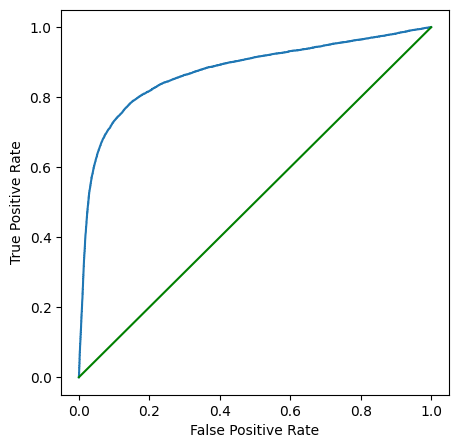

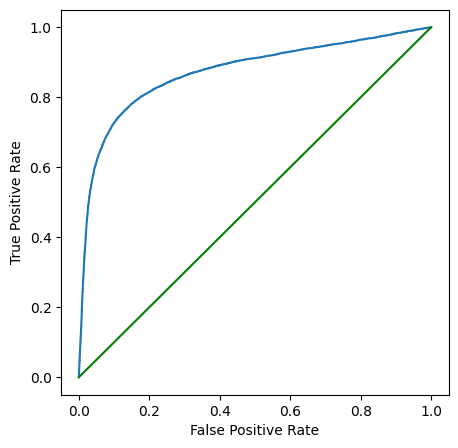

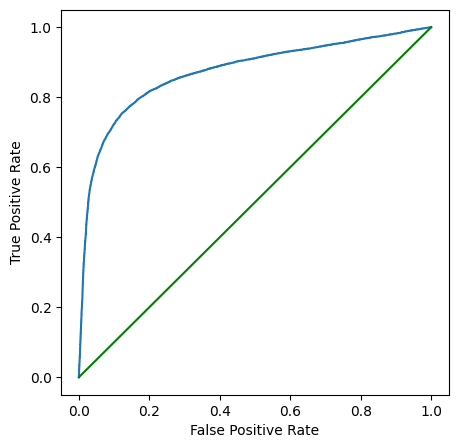

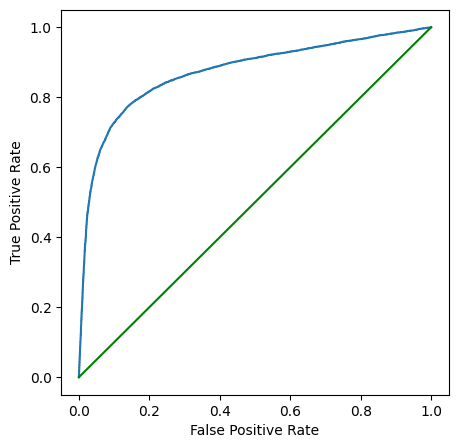

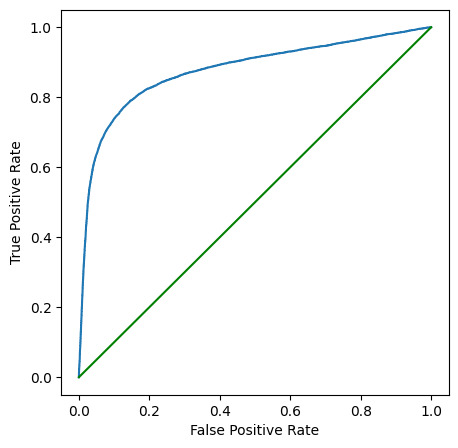

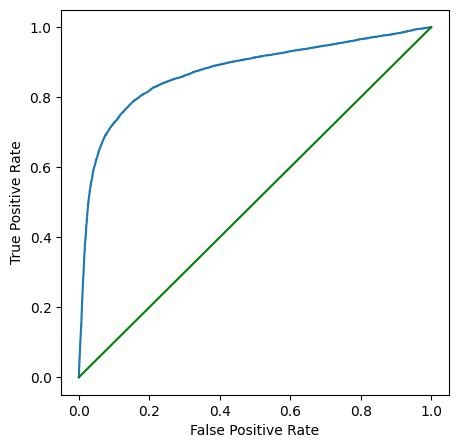

In [19]:
rep = built_experiment(df_train, df_test,"target","Synthetic")
reports.append(rep)
pd.concat(reports)

Running Experiment...
Dataset Name: Synthetic_20
Target Column: target
Building LGBM Model...
ROC Curve for test data: 0.8731056981391032
Saving model as pickle...
Upsampling is being applied...
Building LGBM Upsample Model...
ROC Curve for test data: 0.8729306500215537
Saving model as pickle...
Downsampling is being applied...
Building LGBM Downsample Model...
ROC Curve for test data: 0.8725227380713977
Saving model as pickle...
SMOTE is being applied...
Building SMOTE LGBM Model...
ROC Curve for test data: 0.8708584129280141
Saving model as pickle...
Building LGBM Balanced Bagging Model...
ROC Curve for test data: 0.8759767470366849
Saving model as pickle...


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Number of positive: 26997, number of negative: 107228
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013197 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 134225, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.201132 -> initscore=-1.379232
[LightGBM] [Info] Start training from score -1.379232
ROC Curve for test data: 0.8734466120775934
Saving model as pickle...
        Dataset                  Model   f1_test  f1_train  accuracy_test  \
0     Synthetic          LGBM Baseline  0.723974  0.731522       0.844825   
1     Synthetic          LGBM Upsample  0.748831  0.815346       0.832075   
2     Synthetic        LGBM Downsample  0.747497  0.814401       0.830425   
3     Synthetic             SMOTE LGBM  0.750605  0.816522       0.832425   
4     Synthetic  LGBM Balanced Bagging  0.7231

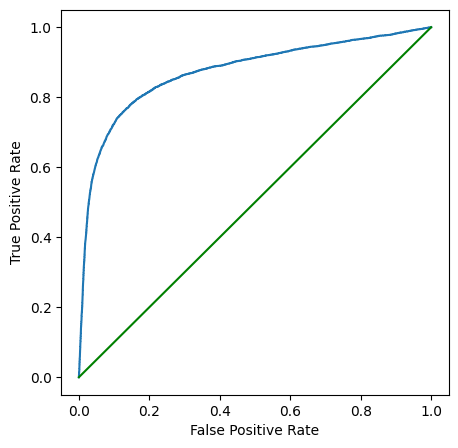

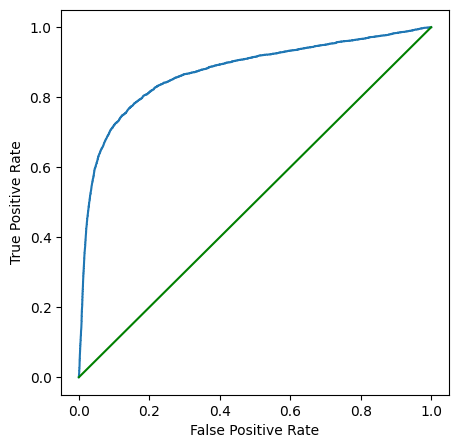

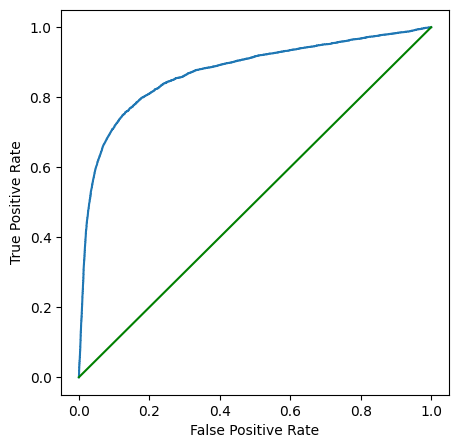

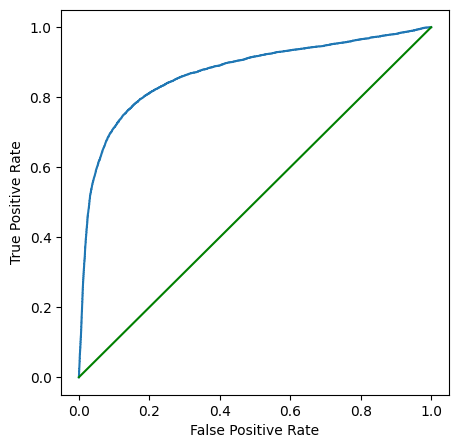

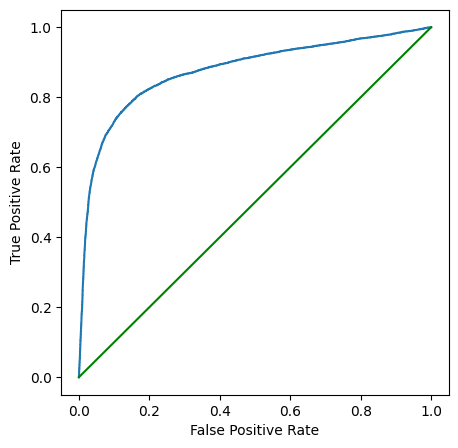

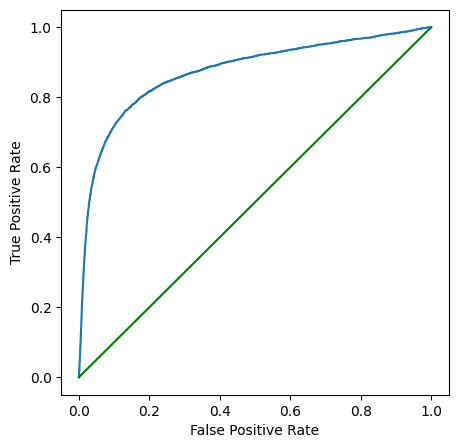

In [21]:
df_02 = get_imbalanced(df_orig,0.2)
df_02_train, df_02_test = train_test_split(df_02, test_size=0.2, random_state=42)
rep_02 = built_experiment(df_02_train, df_02_test,"target","Synthetic_20")
reports.append(rep_02)
print(pd.concat(reports))

Running Experiment...
Dataset Name: Synthetic_10
Target Column: target
Building LGBM Model...
ROC Curve for test data: 0.8672437758055473
Saving model as pickle...
Upsampling is being applied...
Building LGBM Upsample Model...
ROC Curve for test data: 0.8682633050829583
Saving model as pickle...
Downsampling is being applied...
Building LGBM Downsample Model...
ROC Curve for test data: 0.8641792595742807
Saving model as pickle...
SMOTE is being applied...
Building SMOTE LGBM Model...
ROC Curve for test data: 0.8652015604093111
Saving model as pickle...
Building LGBM Balanced Bagging Model...
ROC Curve for test data: 0.8727080135089447
Saving model as pickle...


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Number of positive: 11915, number of negative: 107397
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.125961 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 119312, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.099864 -> initscore=-2.198734
[LightGBM] [Info] Start training from score -2.198734
ROC Curve for test data: 0.8690930883057655
Saving model as pickle...


,Dataset,Model,f1_test,f1_train,accuracy_test,accuracy_train,AUC_test,AUC_train
0,Synthetic,LGBM Baseline,0.723974,0.731522,0.844825,0.847125,0.874678,0.883579
1,Synthetic,LGBM Upsample,0.748831,0.815346,0.832075,0.823693,0.872186,0.886775
2,Synthetic,LGBM Downsample,0.747497,0.814401,0.830425,0.823136,0.872359,0.885266
3,Synthetic,SMOTE LGBM,0.750605,0.816522,0.832425,0.823819,0.872768,0.884604
4,Synthetic,LGBM Balanced Bagging,0.723171,0.729341,0.845675,0.846962,0.876479,0.885629
5,Synthetic,LGBM_Imbalance,0.750564,0.760648,0.834050,0.839531,0.874030,0.883950
0,Synthetic_20,LGBM Baseline,0.610554,0.628263,0.878386,0.880335,0.873106,0.887362
1,Synthetic_20,LGBM Upsample,0.658572,0.817761,0.847483,0.826780,0.872931,0.892685
2,Synthetic_20,LGBM Downsample,0.647813,0.820416,0.836338,0.828222,0.872523,0.894292
3,Synthetic_20,SMOTE LGBM,0.648444,0.819858,0.837113,0.826160,0.870858,0.891235


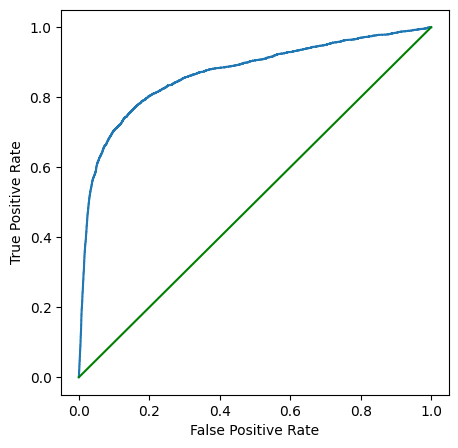

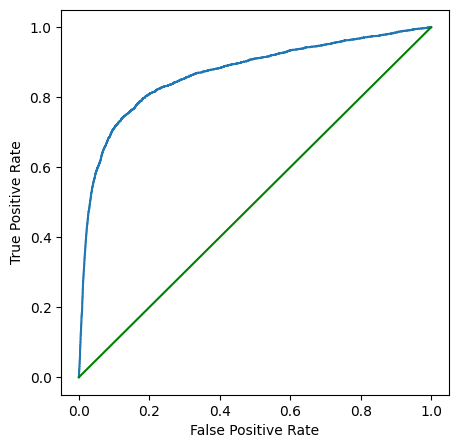

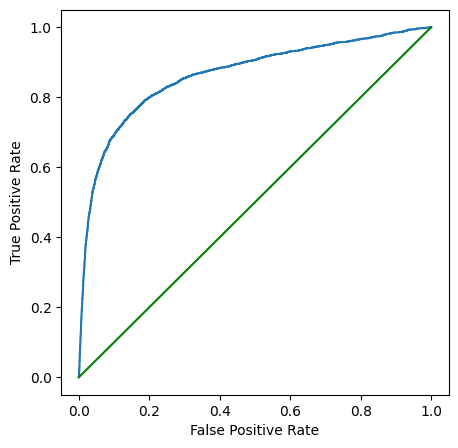

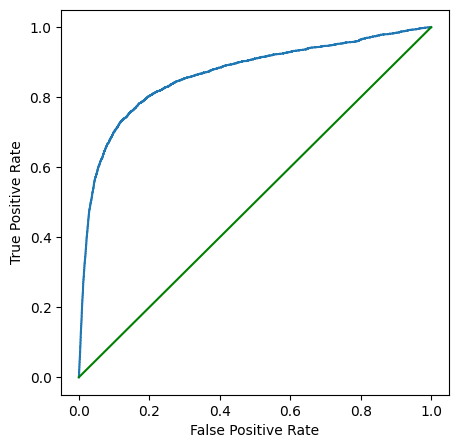

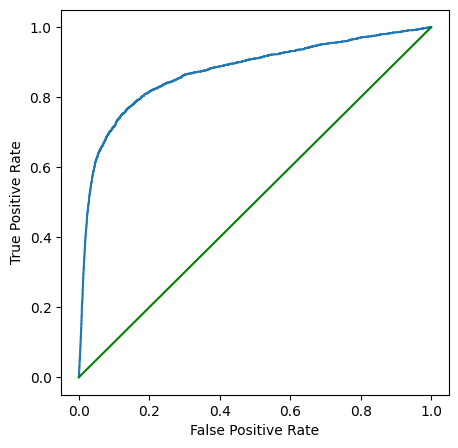

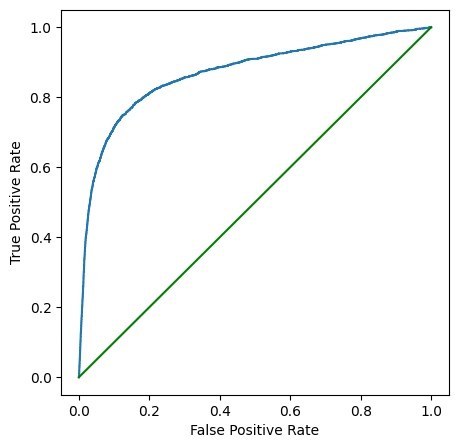

In [22]:
df_01 = get_imbalanced(df_orig,0.1)
df_01_train, df_01_test = train_test_split(df_01, test_size=0.2, random_state=42)
rep_01 = built_experiment(df_01_train, df_01_test,"target","Synthetic_10")
reports.append(rep_01)
pd.concat(reports)

Running Experiment...
Dataset Name: Synthetic-5
Target Column: target
Building LGBM Model...
ROC Curve for test data: 0.8488533055699934
Saving model as pickle...
Upsampling is being applied...
Building LGBM Upsample Model...
ROC Curve for test data: 0.8485731716169913
Saving model as pickle...
Downsampling is being applied...
Building LGBM Downsample Model...
ROC Curve for test data: 0.8476933840346629
Saving model as pickle...
SMOTE is being applied...
Building SMOTE LGBM Model...
ROC Curve for test data: 0.8419615229977206
Saving model as pickle...
Building LGBM Balanced Bagging Model...
ROC Curve for test data: 0.8558772793056012
Saving model as pickle...


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Number of positive: 5667, number of negative: 107365
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011358 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 113032, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.050136 -> initscore=-2.941574
[LightGBM] [Info] Start training from score -2.941574
ROC Curve for test data: 0.8515709204792393
Saving model as pickle...


,Dataset,Model,f1_test,f1_train,accuracy_test,accuracy_train,AUC_test,AUC_train
0,Synthetic,LGBM Baseline,0.723974,0.731522,0.844825,0.847125,0.874678,0.883579
1,Synthetic,LGBM Upsample,0.748831,0.815346,0.832075,0.823693,0.872186,0.886775
2,Synthetic,LGBM Downsample,0.747497,0.814401,0.830425,0.823136,0.872359,0.885266
3,Synthetic,SMOTE LGBM,0.750605,0.816522,0.832425,0.823819,0.872768,0.884604
4,Synthetic,LGBM Balanced Bagging,0.723171,0.729341,0.845675,0.846962,0.876479,0.885629
5,Synthetic,LGBM_Imbalance,0.750564,0.760648,0.834050,0.839531,0.874030,0.883950
0,Synthetic_20,LGBM Baseline,0.610554,0.628263,0.878386,0.880335,0.873106,0.887362
1,Synthetic_20,LGBM Upsample,0.658572,0.817761,0.847483,0.826780,0.872931,0.892685
2,Synthetic_20,LGBM Downsample,0.647813,0.820416,0.836338,0.828222,0.872523,0.894292
3,Synthetic_20,SMOTE LGBM,0.648444,0.819858,0.837113,0.826160,0.870858,0.891235


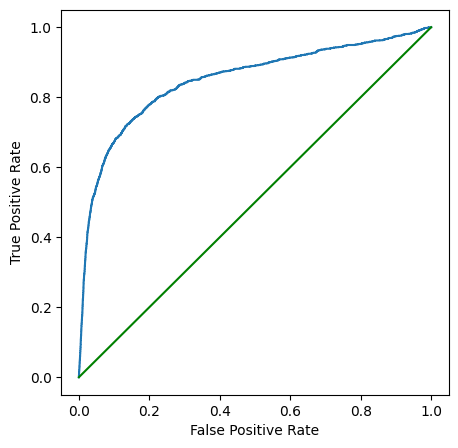

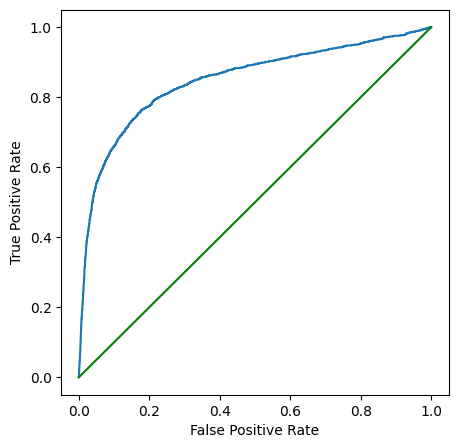

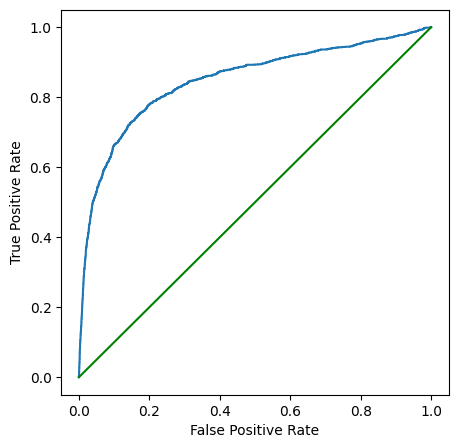

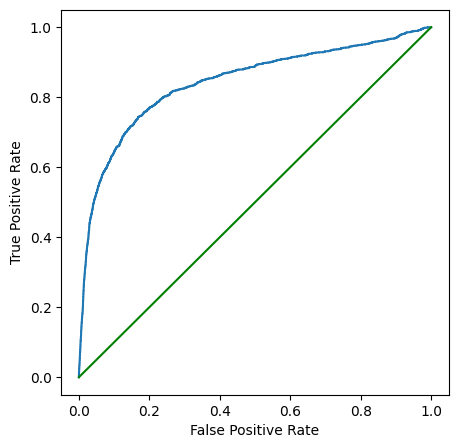

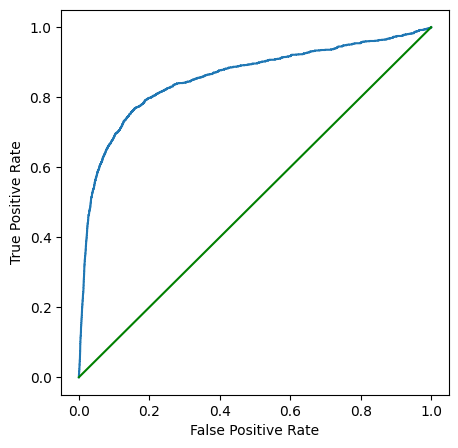

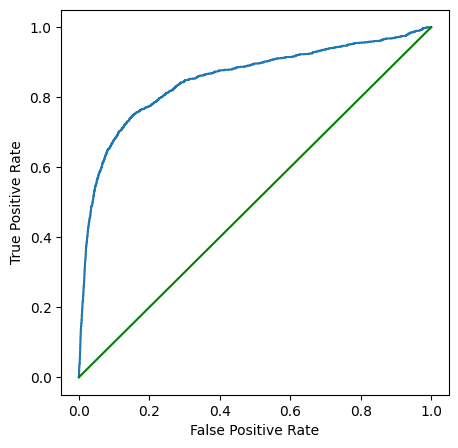

In [27]:
df_005 = get_imbalanced(df_orig,0.05)
df_005_train, df_005_test = train_test_split(df_005, test_size=0.2, random_state=42)
rep_005 = built_experiment(df_005_train, df_005_test,"target","Synthetic-5")
reports.append(rep_005)
pd.concat(reports)

Running Experiment...
Dataset Name: Synthetic-1
Target Column: target
Building LGBM Model...
ROC Curve for test data: 0.7736581912761968
Saving model as pickle...
Upsampling is being applied...
Building LGBM Upsample Model...
ROC Curve for test data: 0.8118977511431056
Saving model as pickle...
Downsampling is being applied...
Building LGBM Downsample Model...
ROC Curve for test data: 0.8003283474026199
Saving model as pickle...
SMOTE is being applied...
Building SMOTE LGBM Model...
ROC Curve for test data: 0.8111639910298852
Saving model as pickle...
Building LGBM Balanced Bagging Model...
ROC Curve for test data: 0.816165421913346
Saving model as pickle...


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Number of positive: 1065, number of negative: 107400
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009730 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 108465, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.009819 -> initscore=-4.613585
[LightGBM] [Info] Start training from score -4.613585
ROC Curve for test data: 0.7549296305092534
Saving model as pickle...


,Dataset,Model,f1_test,f1_train,accuracy_test,accuracy_train,AUC_test,AUC_train
0,Synthetic,LGBM Baseline,0.723974,0.731522,0.844825,0.847125,0.874678,0.883579
1,Synthetic,LGBM Upsample,0.748831,0.815346,0.832075,0.823693,0.872186,0.886775
2,Synthetic,LGBM Downsample,0.747497,0.814401,0.830425,0.823136,0.872359,0.885266
3,Synthetic,SMOTE LGBM,0.750605,0.816522,0.832425,0.823819,0.872768,0.884604
4,Synthetic,LGBM Balanced Bagging,0.723171,0.729341,0.845675,0.846962,0.876479,0.885629
5,Synthetic,LGBM_Imbalance,0.750564,0.760648,0.834050,0.839531,0.874030,0.883950
0,Synthetic_20,LGBM Baseline,0.610554,0.628263,0.878386,0.880335,0.873106,0.887362
1,Synthetic_20,LGBM Upsample,0.658572,0.817761,0.847483,0.826780,0.872931,0.892685
2,Synthetic_20,LGBM Downsample,0.647813,0.820416,0.836338,0.828222,0.872523,0.894292
3,Synthetic_20,SMOTE LGBM,0.648444,0.819858,0.837113,0.826160,0.870858,0.891235


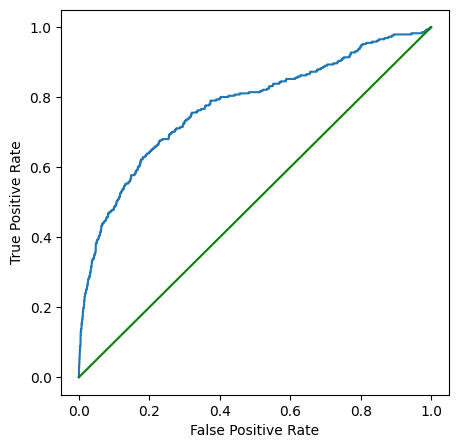

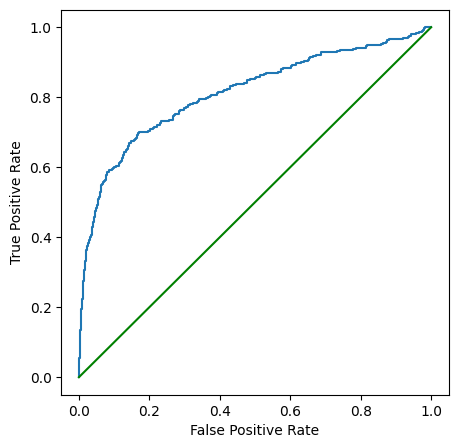

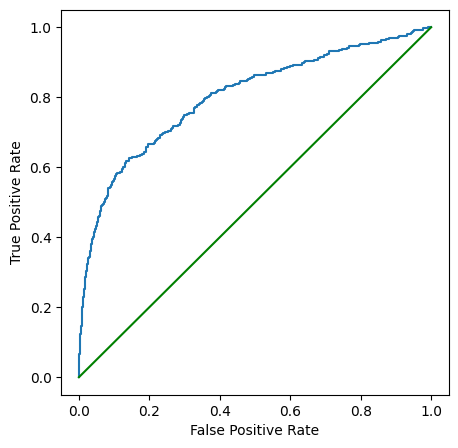

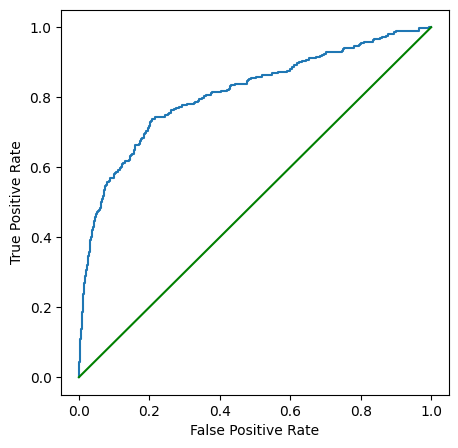

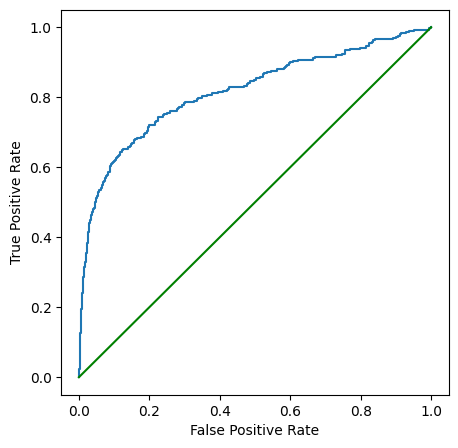

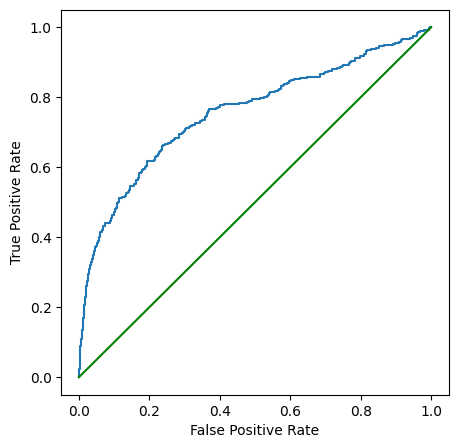

In [28]:
df_001 = get_imbalanced(df_orig,0.01)
df_001_train, df_001_test = train_test_split(df_001, test_size=0.2, random_state=42)
rep_001 = built_experiment(df_001_train, df_001_test,"target","Synthetic-1")
reports.append(rep_001)
pd.concat(reports)

Running Experiment...
Dataset Name: Synthetic-0.5
Target Column: target
Building LGBM Model...
ROC Curve for test data: 0.7856255670059564
Saving model as pickle...
Upsampling is being applied...
Building LGBM Upsample Model...
ROC Curve for test data: 0.8444959591937506
Saving model as pickle...
Downsampling is being applied...
Building LGBM Downsample Model...
ROC Curve for test data: 0.8133324028620204
Saving model as pickle...
SMOTE is being applied...
Building SMOTE LGBM Model...
ROC Curve for test data: 0.8431981862846573
Saving model as pickle...
Building LGBM Balanced Bagging Model...
ROC Curve for test data: 0.8249686698971221
Saving model as pickle...


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Number of positive: 548, number of negative: 107372
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.118977 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 107920, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005078 -> initscore=-5.277779
[LightGBM] [Info] Start training from score -5.277779
ROC Curve for test data: 0.6034083985200814
Saving model as pickle...


,Dataset,Model,f1_test,f1_train,accuracy_test,accuracy_train,AUC_test,AUC_train
0,Synthetic,LGBM Baseline,0.723974,0.731522,0.844825,0.847125,0.874678,0.883579
1,Synthetic,LGBM Upsample,0.748831,0.815346,0.832075,0.823693,0.872186,0.886775
2,Synthetic,LGBM Downsample,0.747497,0.814401,0.830425,0.823136,0.872359,0.885266
3,Synthetic,SMOTE LGBM,0.750605,0.816522,0.832425,0.823819,0.872768,0.884604
4,Synthetic,LGBM Balanced Bagging,0.723171,0.729341,0.845675,0.846962,0.876479,0.885629
5,Synthetic,LGBM_Imbalance,0.750564,0.760648,0.834050,0.839531,0.874030,0.883950
0,Synthetic_20,LGBM Baseline,0.610554,0.628263,0.878386,0.880335,0.873106,0.887362
1,Synthetic_20,LGBM Upsample,0.658572,0.817761,0.847483,0.826780,0.872931,0.892685
2,Synthetic_20,LGBM Downsample,0.647813,0.820416,0.836338,0.828222,0.872523,0.894292
3,Synthetic_20,SMOTE LGBM,0.648444,0.819858,0.837113,0.826160,0.870858,0.891235


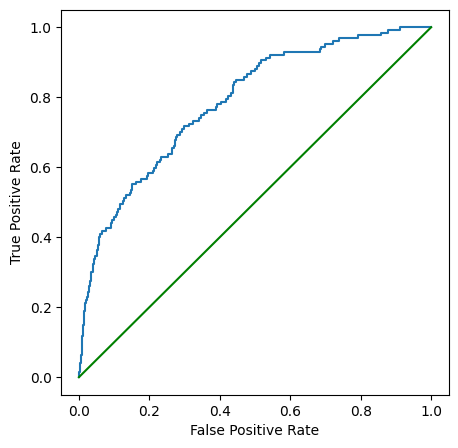

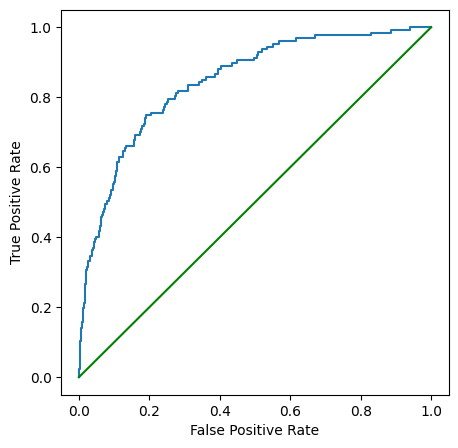

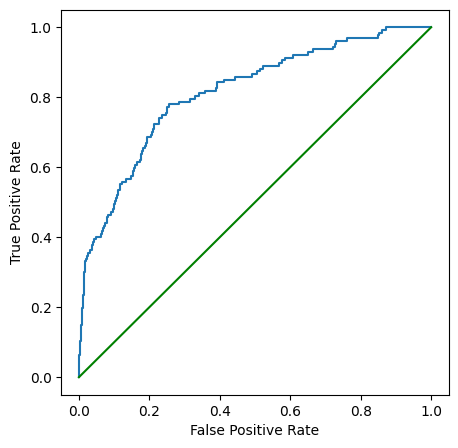

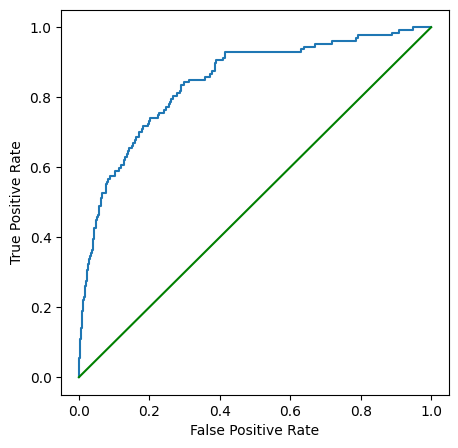

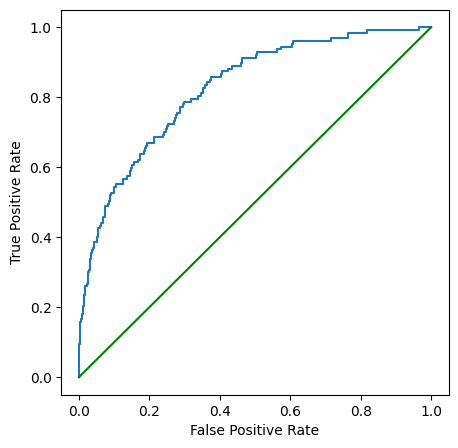

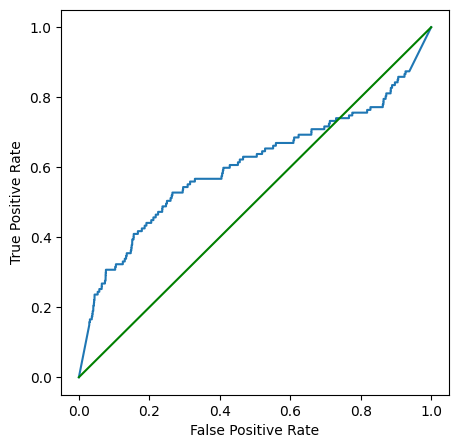

In [42]:
df_005 = get_imbalanced(df_orig,0.005)
df_005_train, df_005_test = train_test_split(df_005, test_size=0.2, random_state=42)
rep_005 = built_experiment(df_005_train, df_005_test,"target","Synthetic-0.5")
reports.append(rep_005)
pd.concat(reports)

In [43]:
experiment_results = pd.concat(reports)

In [44]:
experiment_results.to_excel("synthetic_exp_results.xlsx")

In [33]:
!ls

modelling.py
__pycache__
sample_data
Synthetic-0.5_balanced_bagging_lgbm_model.pkl
Synthetic-0.5_downsample_model.pkl
Synthetic-0.5_lgbm_base_model.pkl
Synthetic-0.5_lgbm_imbalance_model.pkl
Synthetic-0.5_smote_lgbm_model.pkl
Synthetic-0.5_upsample_model.pkl
Synthetic_10_balanced_bagging_lgbm_model.pkl
Synthetic_10_downsample_model.pkl
Synthetic_10_lgbm_base_model.pkl
Synthetic_10_lgbm_imbalance_model.pkl
Synthetic_10_smote_lgbm_model.pkl
Synthetic_10_upsample_model.pkl
Synthetic-1_balanced_bagging_lgbm_model.pkl
Synthetic-1_downsample_model.pkl
Synthetic-1_lgbm_base_model.pkl
Synthetic-1_lgbm_imbalance_model.pkl
Synthetic-1_smote_lgbm_model.pkl
Synthetic-1_upsample_model.pkl
Synthetic_20_balanced_bagging_lgbm_model.pkl
Synthetic_20_downsample_model.pkl
Synthetic_20_lgbm_base_model.pkl
Synthetic_20_lgbm_imbalance_model.pkl
Synthetic_20_smote_lgbm_model.pkl
Synthetic_20_upsample_model.pkl
Synthetic-5_balanced_bagging_lgbm_model.pkl
Synthetic-5_downsample_model.pkl
Synthetic-5_lgbm_base_

In [37]:

fls =[
"Synthetic-0.5_balanced_bagging_lgbm_model.pkl",
"Synthetic-0.5_downsample_model.pkl",
"Synthetic-0.5_lgbm_base_model.pkl",
"Synthetic-0.5_lgbm_imbalance_model.pkl",
"Synthetic-0.5_smote_lgbm_model.pkl",
"Synthetic-0.5_upsample_model.pkl",
"Synthetic_10_balanced_bagging_lgbm_model.pkl",
"Synthetic_10_downsample_model.pkl",
"Synthetic_10_lgbm_base_model.pkl",
"Synthetic_10_lgbm_imbalance_model.pkl",
"Synthetic_10_smote_lgbm_model.pkl",
"Synthetic_10_upsample_model.pkl",
"Synthetic-1_balanced_bagging_lgbm_model.pkl",
"Synthetic-1_downsample_model.pkl",
"Synthetic-1_lgbm_base_model.pkl",
"Synthetic-1_lgbm_imbalance_model.pkl",
"Synthetic-1_smote_lgbm_model.pkl",
"Synthetic-1_upsample_model.pkl",
"Synthetic_20_balanced_bagging_lgbm_model.pkl",
"Synthetic_20_downsample_model.pkl",
"Synthetic_20_lgbm_base_model.pkl",
"Synthetic_20_lgbm_imbalance_model.pkl",
"Synthetic_20_smote_lgbm_model.pkl",
"Synthetic_20_upsample_model.pkl",
"Synthetic-5_balanced_bagging_lgbm_model.pkl",
"Synthetic-5_downsample_model.pkl",
"Synthetic-5_lgbm_base_model.pkl",
"Synthetic-5_lgbm_imbalance_model.pkl",
"Synthetic-5_smote_lgbm_model.pkl",
"Synthetic-5_upsample_model.pkl",
"Synthetic_balanced_bagging_lgbm_model.pkl",
"Synthetic_downsample_model.pkl",
"Synthetic_lgbm_base_model.pkl",
"Synthetic_lgbm_imbalance_model.pkl",
"Synthetic_smote_lgbm_model.pkl",
"Synthetic_upsample_model.pkl"]

In [38]:
from google.colab import files
for f in fls:
  files.download(f)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>